# Lab 5: Feature Engineering and Model Selection

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Set some display settings.
sns.set(context='notebook')

# Defining a "plot" dataset

We're going to be fitting models to 1-D data, so we'll be able to plot it. It will be convenient to have a "plot" dataset that we can ask our models to predict on that's in exactly the same form as our actual data.

Notice that it only has an "x".

In [2]:
plot_dataset = pd.DataFrame({"x": np.linspace(0.0, 1.0, 500)})

# Make the data
(This will get moved to the end.)

In [3]:
data = pd.DataFrame({"x": np.linspace(0., 1., 200)})
#data['y'] = .75 - abs(2 * (data['x'] - .75)) + .15 * np.random.RandomState(0).standard_normal(len(data.x))
data['y'] = .5 + 1. * np.sin(3 * data['x']) + .25 * np.random.RandomState(0).standard_normal(len(data.x))
data = data.sample(frac=1., random_state=0)
train = data.iloc[:50]
test = data.iloc[50:]
len(train), len(test)
del data

In [4]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

# Load and visualize our data

Load up 'train.csv' (don't look at test.csv yet).

In [5]:
train = pd.read_csv('data/train.csv')
print(len(train), 'datapoints')
train.head()

50 datapoints


,x,y
0,0.090452,0.846306
1,0.854271,1.277217
2,0.537688,1.312243
3,0.492462,1.527369
4,0.889447,0.783395


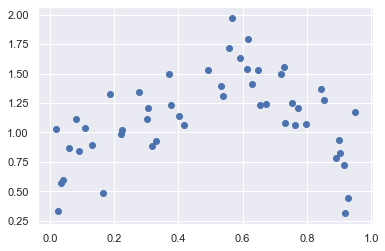

In [7]:
plt.scatter(train['x'], train['y'])

It looks like it's increasing for lower values of `x`, then decreasing for higher values of `x`.

# Simple linear fit

In [8]:
def transform(data):
    X = data[['x']]
    return X

train_X = transform(train)
train_y = train.y

In [9]:
linreg = LinearRegression().fit(train_X, train_y)

Training R^2 0.0405868946813569


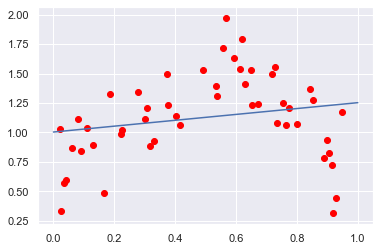

In [11]:
plt.scatter(train.x, train.y, color="red")
plt.plot(plot_dataset.x, linreg.predict(transform(plot_dataset)))
print("Training R^2", metrics.r2_score(train_y, linreg.predict(train_X)))

# Add a polynomial feature

In [22]:
def transform(data):
    x = data['x'].values
    predictors = [
        x,
        x ** 2
    ]
    return np.stack(predictors, axis=1)

train_X = transform(train)
train_y = train.y
train_X.shape

(50, 2)

In [23]:
linreg = LinearRegression().fit(train_X, train_y)

Training R^2 0.5343181760700715


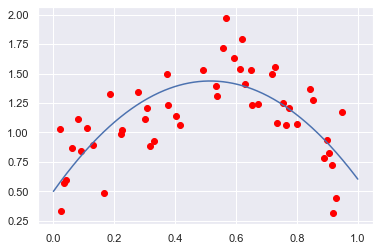

In [24]:
plt.scatter(train.x, train.y, color="red")
plt.plot(plot_dataset.x, linreg.predict(transform(plot_dataset)))
print("Training R^2", metrics.r2_score(train_y, linreg.predict(train_X)))

# Try improving that fit even more

Things you might try adding:

* higher-degree polynomial terms ($x^3$, etc.)
* ReLUs (`np.maximum(0, x - .5)`, etc.)
* Periodic functions ($\sin(x)$, $\sin(5x)$, $\cos(5x)$, etc.)
* $\log(x+.1)$, $\exp$, ...

See if you can get the R^2 to be above 0.8.

Training R^2 0.8044771490510917


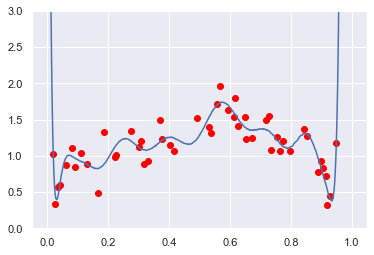

In [69]:
def transform(data):
    x = data['x'].values
    predictors = [
        x,
        x ** 2,
#         np.maximum(0, x - .5),
#         np.maximum(0, x - .25),
#         np.maximum(0, x - .75),
#         x ** 3,
#         x ** 4,
        np.sin(x),
        np.cos(x),
        np.sin(2*x),
        np.cos(2*x),
        np.sin(3*x),
        np.cos(3*x),
        np.sin(4*x),
        np.cos(4*x),
        np.sin(5*x),
        np.cos(5*x),
        np.sin(6*x),
        np.cos(6*x),
        np.sin(7*x),
        np.cos(7*x),
        np.sin(8*x),
        np.cos(8*x),
        np.sin(9*x),
        np.cos(9*x),
        np.sin(10*x),
        np.cos(10*x),
        #np.log(x + .1),
#         np.exp(x),
#         x ** 5,
#         x ** 6,
#         x ** 7,
#         x ** 8,
#         x ** 9,
#         x ** 10
    ]
    return np.stack(predictors, axis=1)

train_X = transform(train)
train_y = train.y

linreg = LinearRegression().fit(train_X, train_y)

plt.scatter(train.x, train.y, color="red")
plt.plot(plot_dataset.x, linreg.predict(transform(plot_dataset)))
plt.ylim([0, 3])
print("Training R^2", metrics.r2_score(train_y, linreg.predict(train_X)))

In [59]:
linreg.coef_

array([-7.68854190e+11, -9.32490151e+11,  1.30341532e+00, -3.38904601e+01,
       -2.26949908e+01, -4.00887814e+10,  3.42146512e+10,  2.69282563e+11,
       -1.37689032e+12, -1.02434914e+09,  3.38258427e+09,  5.01620325e+11,
       -6.15141408e+09, -2.30772247e+09, -7.25753684e+07])

# Generalization
Ok, we got a model that worked great! Now let's test it on some data it hasn't seen before. Load the test data!

In [70]:
test = pd.read_csv('data/test.csv')

Now let's make that plot and R^2 like above, but with the test data instead of the training data.

**Important**: *don't* re-fit the model here! Just use the `linreg` model from above.

Test R^2: -2073.889849345129


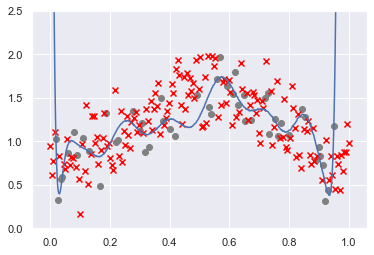

In [71]:
test_X = transform(test)
test_y = test.y
plt.scatter(train.x, train.y, color='grey')
plt.scatter(test.x, test.y, color='red', marker='x')
plt.plot(plot_dataset.x, linreg.predict(transform(plot_dataset)))
plt.ylim([0.0, 2.5])
print("Test R^2:", metrics.r2_score(test_y, linreg.predict(test_X)))

1. What do you notice? 
2. Why do you think that happened?

# Varying num predictors

In [74]:
train_r2s = []
test_r2s = []
num_predictors_vals = np.arange(1, train_X.shape[1])
for num_predictors in num_predictors_vals:
    linreg = LinearRegression().fit(train_X[:,:num_predictors], train_y)
    train_r2s.append(metrics.r2_score(train_y, linreg.predict(train_X[:,:num_predictors])))

    test_X = transform(test)
    test_y = test.y
    test_r2s.append(metrics.r2_score(test_y, linreg.predict(test_X[:,:num_predictors])))

(-0.1, 1)

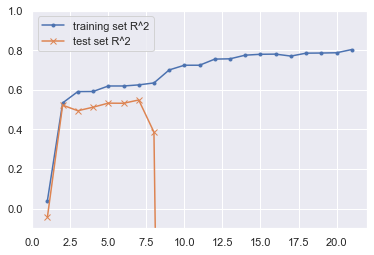

In [77]:
plt.plot(num_predictors_vals, train_r2s, marker='.', label="training set R^2")
plt.plot(num_predictors_vals, test_r2s, marker='x', label="test set R^2")
plt.legend()
plt.ylim([-.1, 1])

Below here, copy and paste the `transform` function, but change it to the one you would now use.

Why did you include those predictors?

How could we have realized that we were going to do so badly on unseen data?